# 1. Perform an exploratory analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
origin = pd.read_csv("../dataset/results-2021-12-18.csv")
origin

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
0,AdaBoost,2.1,103,2,2730,8169,0.012593,1.638312,1.037993,2.012923,0.043739,1.489494,float64,0.960684,0.893617,0.802548,0.845638
1,Decision Tree,2.2,33,2,3900,2451,0.027051,1.431261,0.068482,1.506254,0.064431,1.478886,float64,0.963517,0.872146,0.852679,0.862302
2,SVM,2.2,15,22,3900,4084,0.018298,1.467225,0.530155,1.941215,0.303603,1.687695,float64,0.828349,0.431965,0.892857,0.582242
3,AdaBoost,2.2,112,1,3900,1633,0.026226,1.454106,0.243067,1.780723,0.093800,1.514068,float64,0.970096,0.910377,0.861607,0.885321
4,Bagging Classifier,2.2,138,6,3900,6535,0.027610,1.476311,0.699298,2.067553,0.056580,1.496940,float64,0.964115,0.910000,0.812500,0.858491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Random Forest,2.2,96,2,3900,4901,0.025976,1.473068,1.501089,2.928194,0.082175,1.543079,float64,0.978469,0.989583,0.848214,0.913462
3596,Bagging Classifier,2.1,126,20,1559,8169,0.006985,1.440221,0.170978,1.651912,0.037567,1.460747,float64,0.952167,0.926471,0.700000,0.797468
3597,SVM,2.2,17,19,3900,5718,0.090063,1.408732,1.108957,2.026484,0.488150,1.690740,float64,0.828349,0.431965,0.892857,0.582242
3598,Random Forest,2.1,86,18,1559,8169,0.007155,1.437659,0.581876,2.033274,0.046828,1.480216,float64,0.955157,1.000000,0.666667,0.800000


In [3]:
# 统计 ("no_datapoints", "no_features")点对的分布情况
pairs_count = origin[["no_datapoints", "no_features"]].value_counts()
pairs_count

no_datapoints  no_features
3900           8169           360
               1633           180
               7352           180
               6535           180
               5718           180
               4901           180
               4084           180
               3268           180
               2451           180
389            8169           180
779            8169           180
3509           8169           180
3119           8169           180
2730           8169           180
2340           8169           180
1950           8169           180
1559           8169           180
1169           8169           180
3900           817            180
dtype: int64

In [4]:
# 一个能把图表变得符合要求的函数
def optimize(axes, xlabel, ylabel):
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, rotation='horizontal', ha='right', y=1, va='bottom')

In [5]:
# 将横纵坐标对绘制到图表对应位置
def show_num_dist(axes, pairs_data, label, dot_size=None, alpha=1):
    axes.scatter([x[0] for x in pairs_data], [x[1] for x in pairs_data], s=dot_size, alpha=alpha, label=label)

In [6]:
# 标示坐标对应位置数据值
def show_pair_cum(axes, pairs_data):
    for k, v in pairs_data.items():
        axes.text(k[0] + 50, k[1] - 250, v)

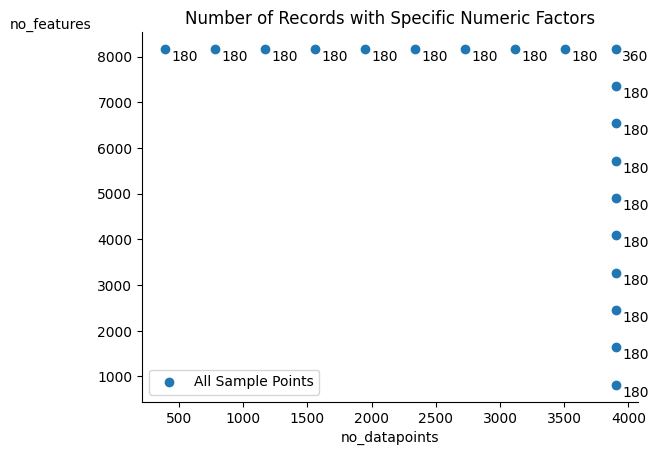

In [7]:
# 在平面直角坐标系中标示训练参数的分布情况
fig, ax = plt.subplots()
show_num_dist(ax, pairs_count.index, label="All Sample Points")
optimize(ax, "no_datapoints", "no_features")
show_pair_cum(ax, pairs_count)
ax.set_title("Number of Records with Specific Numeric Factors")
ax.legend();

In [8]:
# 将RQ2.1和RQ2.2的记录分别取出
rq2_1_data = origin[origin["RQ"] == 2.1]
rq2_2_data = origin[origin["RQ"] == 2.2]

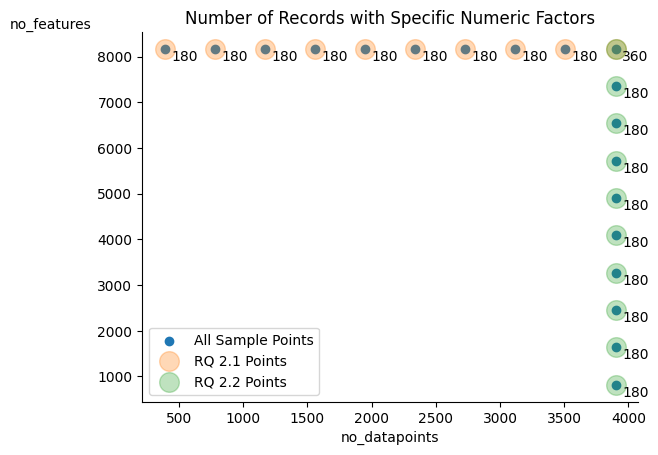

In [9]:
# 对采样点重上色，以区分RQ2.1和RQ2.2
show_num_dist(ax, rq2_1_data[["no_datapoints", "no_features"]].value_counts().index, alpha=0.3, dot_size=200, label="RQ 2.1 Points")
show_num_dist(ax, rq2_2_data[["no_datapoints", "no_features"]].value_counts().index, alpha=0.3, dot_size=200, label="RQ 2.2 Points")
ax.legend()
fig

In [10]:
# 统计不同算法对应记录数量
algo_kinds = origin["algorithm"].value_counts()
algo_kinds

AdaBoost              600
Decision Tree         600
SVM                   600
Bagging Classifier    600
KNN                   600
Random Forest         600
Name: algorithm, dtype: int64

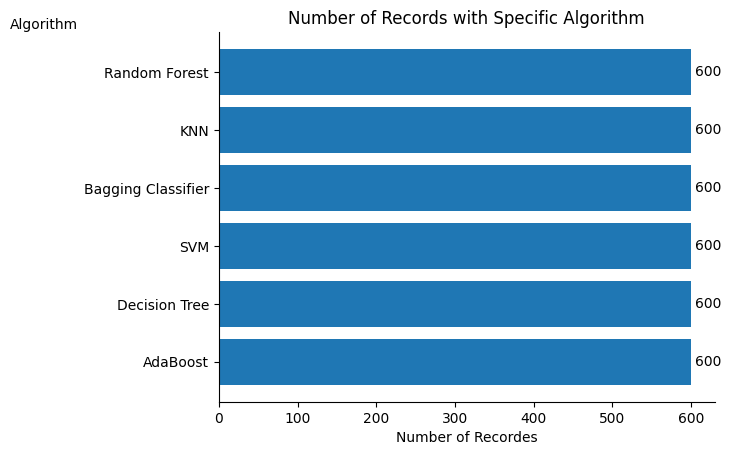

In [11]:
fig, ax = plt.subplots()
bars = ax.barh(algo_kinds.index, algo_kinds)
ax.bar_label(bars, padding=3)
ax.set_title("Number of Records with Specific Algorithm")
optimize(ax, 'Number of Recordes', 'Algorithm')

In [12]:
algo_samp_2_1 = pd.DataFrame(rq2_1_data[["algorithm", "no_datapoints"]].value_counts().sort_index())
algo_samp_2_2 = pd.DataFrame(rq2_2_data[["algorithm", "no_features"]].value_counts().sort_index())
algo_samp_2_2

0
algorithm          no_features    
AdaBoost           817          30
                   1633         30
                   2451         30
                   3268         30
                   4084         30
                   4901         30
                   5718         30
                   6535         30
                   7352         30
                   8169         30
Bagging Classifier 817          30
                   1633         30
                   2451         30
                   3268         30
                   4084         30
                   4901         30
                   5718         30
                   6535         30
                   7352         30
                   8169         30
Decision Tree      817          30
                   1633         30
                   2451         30
                   3268         30
                   4084         30
                   4901         30
                   5718         30
                   6535         30
                   7352         30
                   8169         30
KNN                817          30
                   1633         30
                   2451         30
                   3268         30
                   4084         30
                   4901         30
                   5718         30
                   6535         30
                   7352         30
                   8169         30
Random Forest      817          30
                   1633         30
                   2451         30
                   3268         30
                   4084         30
                   4901         30
                   5718         30
                   6535         30
                   7352         30
                   8169         30
SVM                817          30
                   1633         30
                   2451         30
                   3268         30
                   4084         30
                   4901         30
                   5718         30
                   6535         30
                   7352         30
                   8169         30

In [13]:
def show_algo_samp(ax, algo_samp, width):
    offset = -2.5
    groups = algo_samp.groupby("algorithm")
    for algo in algo_kinds.index:
        data = groups.get_group(algo)
        ax.bar(np.array([x[1] for x in data.index]) + offset * width, [x[0] for x in data.values], width=width, label=algo)
        offset += 1

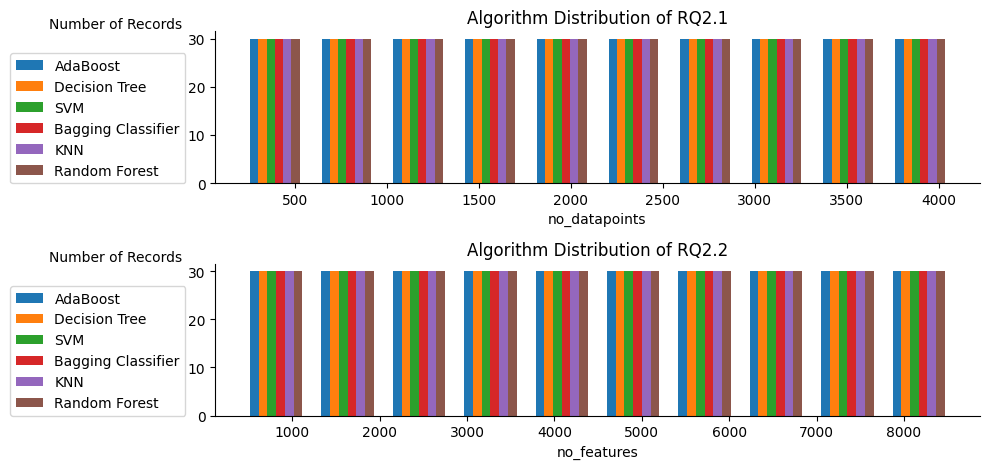

In [14]:
# 查看各采样点中不同算法的占比
fig, ax = plt.subplots(2, 1)
fig.set_figwidth(10)

# 首先对no_features值均为8169，即RQ2.1的采样点进行检查
show_algo_samp(ax[0], algo_samp_2_1, 45)
optimize(ax[0], "no_datapoints", "Number of Records")
ax[0].set_title("Algorithm Distribution of RQ2.1")
ax[0].legend(bbox_to_anchor=(-0.03, 0.9, 0, 0))

# 然后对no_datapoints值均为3900，即RQ2.2的采样点进行检查
show_algo_samp(ax[1], algo_samp_2_2, 100)
optimize(ax[1], "no_features", "Number of Records")
ax[1].set_title("Algorithm Distribution of RQ2.2")
ax[1].legend(bbox_to_anchor=(-0.03, 0.9, 0, 0))

fig.tight_layout()

# 2. Show How no_features Affects Energy Consumption

In [15]:
feat_SVM = rq2_2_data[rq2_2_data["algorithm"] == "SVM"][["no_features", "train_energy(J)"]]
feat_SVM

,no_features,train_energy(J)
2,4084,0.530155
10,8169,0.412243
29,6535,0.485354
50,3268,0.319910
63,817,0.292157
...,...,...
3543,8169,0.413254
3565,1633,0.513829
3577,1633,0.275112
3585,5718,0.371999


In [16]:
def sca_from_two_col(method):
    def f(axes, map_table, x_name, y_name, label=''):
        groups = map_table.groupby(x_name)
        data = {k: method(v[y_name]) for k, v in groups}
        axes.plot(data.keys(), data.values(), label=label)
    return f

In [17]:
avg_from_two_col = sca_from_two_col(np.average)
std_from_two_col = sca_from_two_col(np.std)

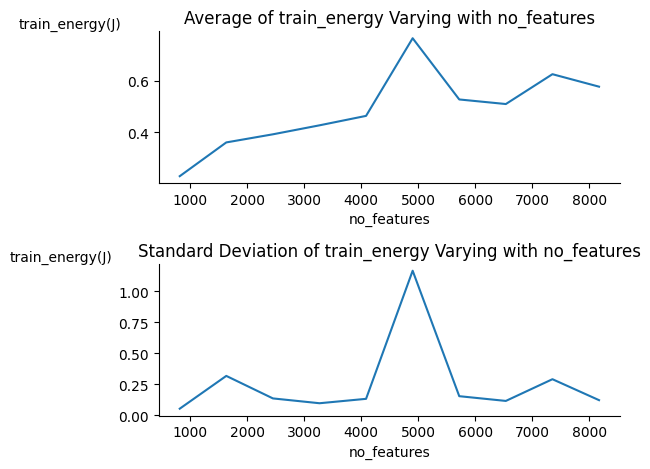

In [18]:
fig, ax = plt.subplots(2, 1)

avg_from_two_col(ax[0], feat_SVM, "no_features", "train_energy(J)")
ax[0].set_title("Average of train_energy Varying with no_features")
optimize(ax[0], "no_features", "train_energy(J)")

std_from_two_col(ax[1], feat_SVM, "no_features", "train_energy(J)")
ax[1].set_title("Standard Deviation of train_energy Varying with no_features")
optimize(ax[1], "no_features", "train_energy(J)")

fig.tight_layout()

In [19]:
# 忽有高人现世，絮絮然数言而隐
groups = feat_SVM.groupby("no_features")
avgs = groups.mean()["train_energy(J)"]
stds = groups.std()["train_energy(J)"]
avgs

no_features
817     0.230795
1633    0.361255
2451    0.392624
3268    0.427346
4084    0.463803
4901    0.763848
5718    0.527261
6535    0.509580
7352    0.624900
8169    0.576659
Name: train_energy(J), dtype: float64

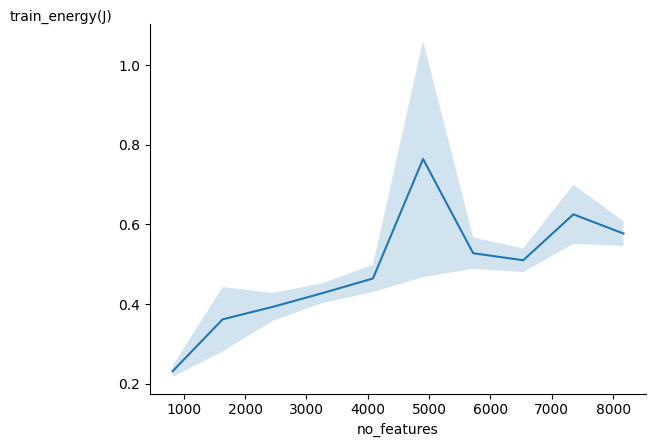

In [20]:
fig, ax = plt.subplots()
ax.plot(avgs.index, avgs)
ax.fill_between(avgs.index, avgs - 0.25 * stds, avgs + 0.25 * stds, alpha=0.2)
optimize(ax, "no_features", "train_energy(J)")

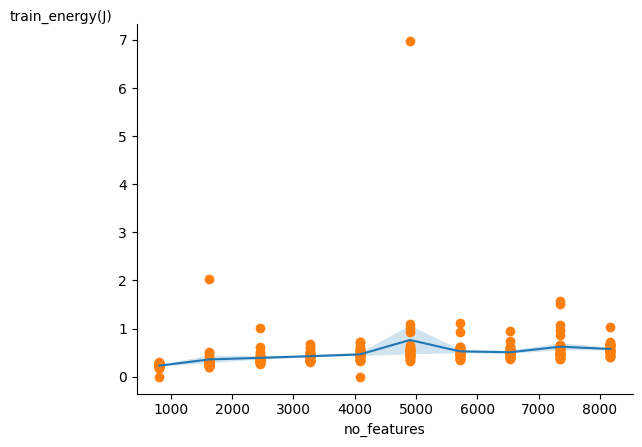

In [21]:
ax.scatter(feat_SVM["no_features"], feat_SVM["train_energy(J)"])
fig

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='no_features', ylabel='train_energy(J)'>

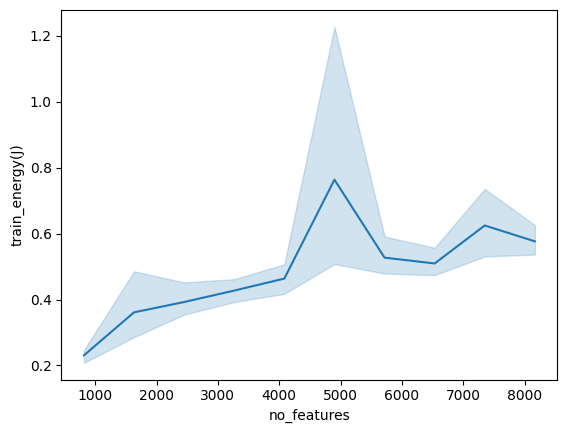

In [23]:
sns.lineplot(feat_SVM, x="no_features", y="train_energy(J)")

In [24]:
def box_from_two_col(axes, map_table, x_name, y_name):
    groups = map_table.groupby(x_name)
    keys = [k for k, _ in groups]
    value_arrs = [v[y_name] for _, v in groups]
    axes.boxplot(value_arrs, labels=keys)

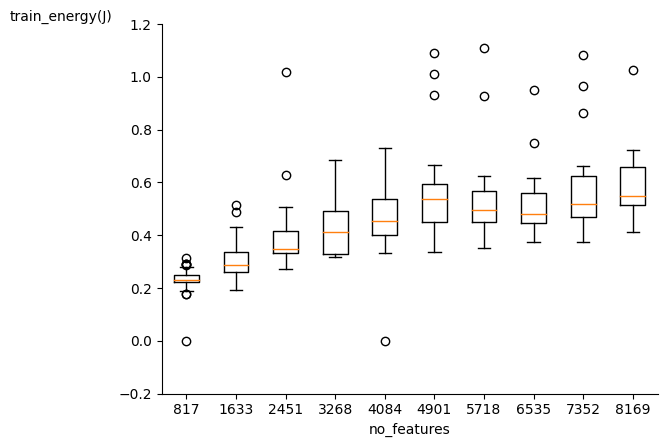

In [25]:
fig, ax = plt.subplots()
box_from_two_col(ax, feat_SVM, "no_features", "train_energy(J)")
ax.set_ylim(-0.2, 1.2)
optimize(ax, "no_features", "train_energy(J)")

# 3. 

In [26]:
def show_group_change(axes, data, index_name, index_list, agg_method, x_name, y_name):
    show_method = sca_from_two_col(agg_method)
    for item in index_list:
        group = data[data[index_name] == item][[x_name, y_name]]
        show_method(axes, group, x_name, y_name, label=item)

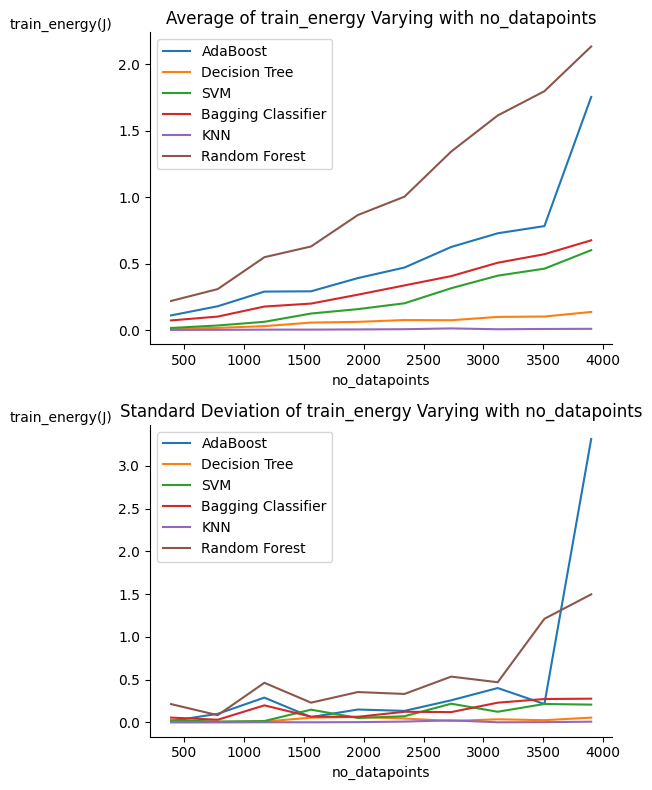

In [27]:
fig, ax = plt.subplots(2, 1)
fig.set_figheight(8)

# for algo in algo_kinds.keys():
#     datap = rq2_1_data[rq2_1_data["algorithm"] == algo][["no_datapoints", "train_energy(J)"]]
#     std_from_two_col(ax, datap, "no_datapoints", "train_energy(J)", label=algo)

show_group_change(ax[0], rq2_1_data, "algorithm", algo_kinds.keys(), np.average, "no_datapoints", "train_energy(J)")
ax[0].set_title("Average of train_energy Varying with no_datapoints")

show_group_change(ax[1], rq2_1_data, "algorithm", algo_kinds.keys(), np.std, "no_datapoints", "train_energy(J)")
ax[1].set_title("Standard Deviation of train_energy Varying with no_datapoints")

optimize(ax[0], "no_datapoints", "train_energy(J)")
optimize(ax[1], "no_datapoints", "train_energy(J)")
ax[0].legend()
ax[1].legend()

fig.tight_layout();

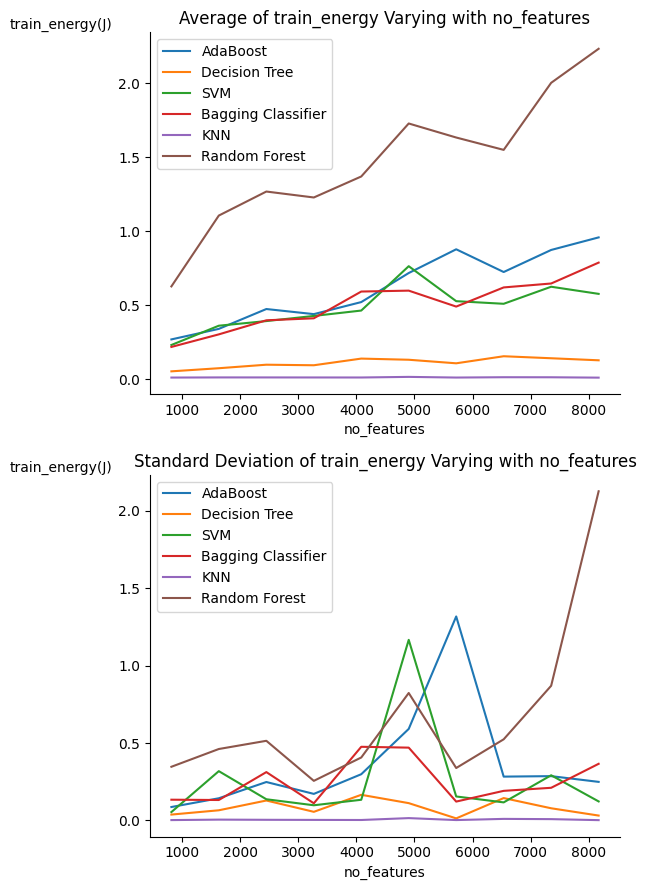

In [28]:
fig, ax = plt.subplots(2, 1)
fig.set_figheight(9)

show_group_change(ax[0], rq2_2_data, "algorithm", algo_kinds.keys(), np.average, "no_features", "train_energy(J)")
ax[0].set_title("Average of train_energy Varying with no_features")

show_group_change(ax[1], rq2_2_data, "algorithm", algo_kinds.keys(), np.std, "no_features", "train_energy(J)")
ax[1].set_title("Standard Deviation of train_energy Varying with no_features")

optimize(ax[0], "no_features", "train_energy(J)")
optimize(ax[1], "no_features", "train_energy(J)")
ax[0].legend()
ax[1].legend()

fig.tight_layout();